In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sklearn.datasets as dt

from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve

In [10]:
D = dt.load_breast_cancer()
D.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [12]:
print(D['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [14]:
X = D.data
y = D.target
print(X.shape, type(X))
print(np.unique(y))

(569, 30) <class 'numpy.ndarray'>
[0 1]


In [15]:
print(np.sum(y==0))
print(np.sum(y==1))

212
357


In [16]:
# Porque quero que os benignos tenham target = 1
y = np.abs(y-1)

In [17]:
print(np.sum(y==0))
print(np.sum(y==1))

357
212


In [19]:
X1, X2, y1, y2 = train_test_split(X, y, test_size=1/3, random_state=42, stratify=y)

O dominio de cada feature é diferente, pelo que o modelo vai tomar mais atenção às caracteristicas com maior variância. Desta forma, podemos normalizar as caracterisiticas com o StandardScaler. 

Remover a média e dividir pelo número - Ação do StandardScaler

### Sem data normalizada

In [26]:
svm = SVC()
svm.fit(X1, y1)
y2e = svm.predict(X2)
CM = confusion_matrix(y2, y2e)

In [28]:
print(CM)

[[119   0]
 [ 18  53]]


In [32]:
print(1-(CM[0, 1] + CM[1, 0])/X2.shape[0])

0.9052631578947369


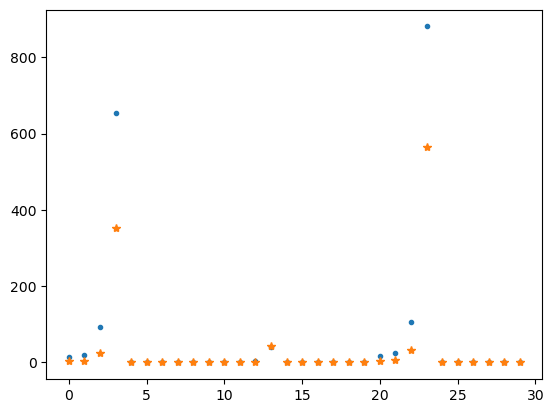

In [46]:
plt.plot(np.mean(X1, axis=0), '.')
plt.plot(np.std(X1, axis=0), '*')

### Com data normalizados

In [38]:
sc = StandardScaler().fit(X1)
X1n = sc.transform(X1)
X2n = sc.transform(X2)

In [42]:
svm = SVC()
svm.fit(X1n, y1)
y2e = svm.predict(X2n)
CM = confusion_matrix(y2, y2e)

In [43]:
print(CM)

[[119   0]
 [  9  62]]


In [44]:
print(1-(CM[0, 1] + CM[1, 0])/X2.shape[0])

0.9526315789473684


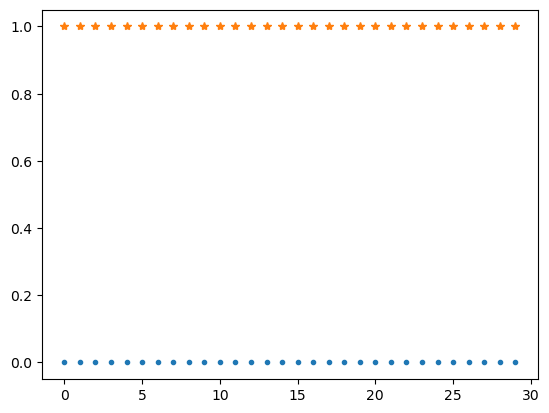

In [47]:
plt.plot(np.mean(X1n, axis=0), '.')
plt.plot(np.std(X1n, axis=0), '*')

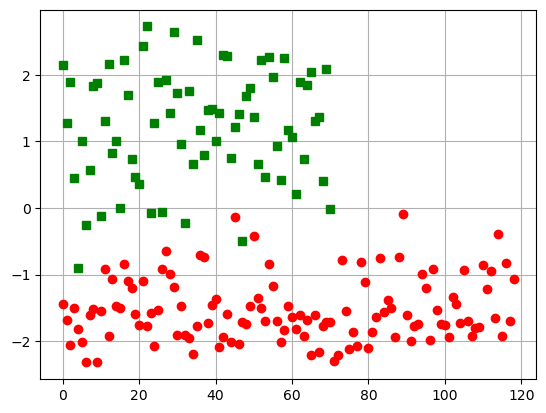

In [54]:
### Alterar o threshlod da SVM
y2d = svm.decision_function(X2n)
plt.plot(y2d[y2==0], 'or')
plt.plot(y2d[y2==1], 'sg')
plt.grid(True)

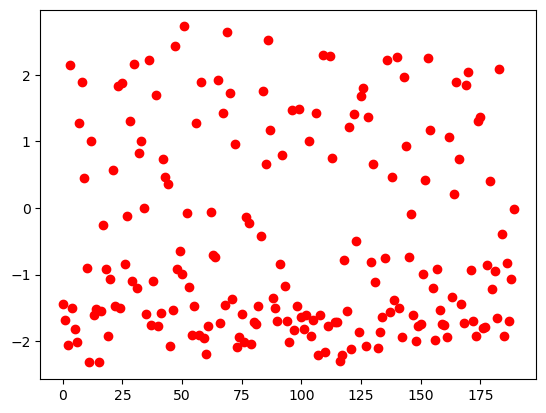

In [55]:
plt.plot(y2d, 'or')

In [56]:
X2.shape

(190, 30)

In [63]:
print(np.sum(y2==0), np.sum(y2==1))

119 71


### Escalas diferentes

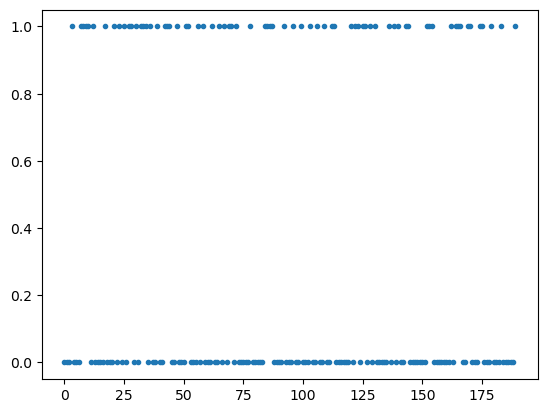

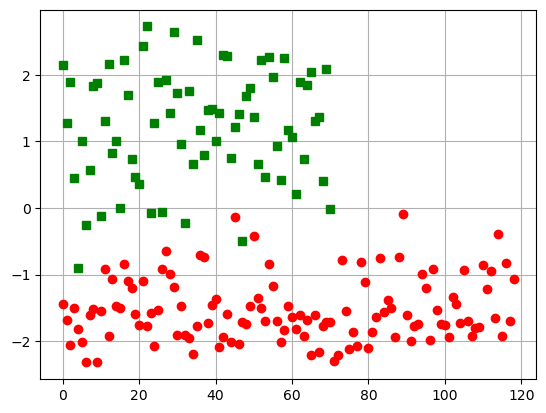

In [64]:
plt.plot(y2, '.')
plt.figure()
plt.plot(y2d[y2==0], 'or')
plt.plot(y2d[y2==1], 'sg')
plt.grid(True)

### Colocar nas escalas certas
### Escalas diferentes

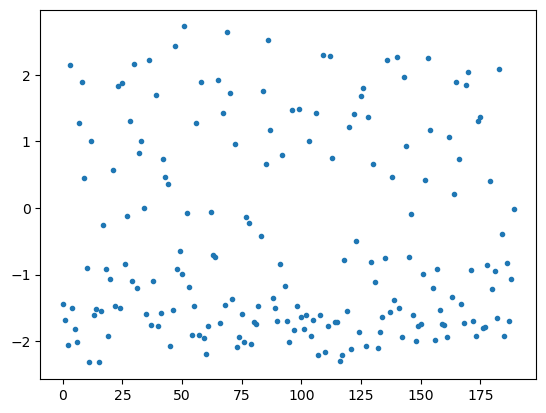

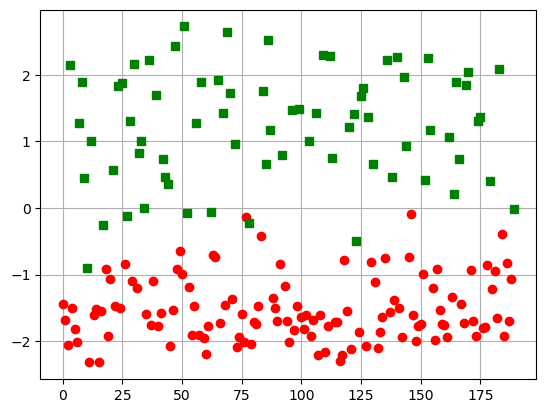

In [65]:
plt.plot(y2d, '.')
plt.figure()
t = np.arange(0, 190)
plt.plot(t[y2==0], y2d[y2==0], 'or')
plt.plot(t[y2==1], y2d[y2==1], 'sg')
plt.grid(True)

Para escolher o threshlod posso fazer várias matrizes de confusão com diferntes valores para ver qual cumpre o objetivo. 

In [70]:
print('Th=0.75')
print(confusion_matrix(y2, y2d>=0.75), '\n')
print('Th=0.5')
print(confusion_matrix(y2, y2d>=0.5), '\n')

Th=0.75
[[119   0]
 [ 22  49]] 

Th=0.5
[[119   0]
 [ 16  55]] 



Para construir a curva ROC preciso de ter um valor contínuo (saída da função de decisão)

(-0.05, 1.05, -0.05, 1.05)

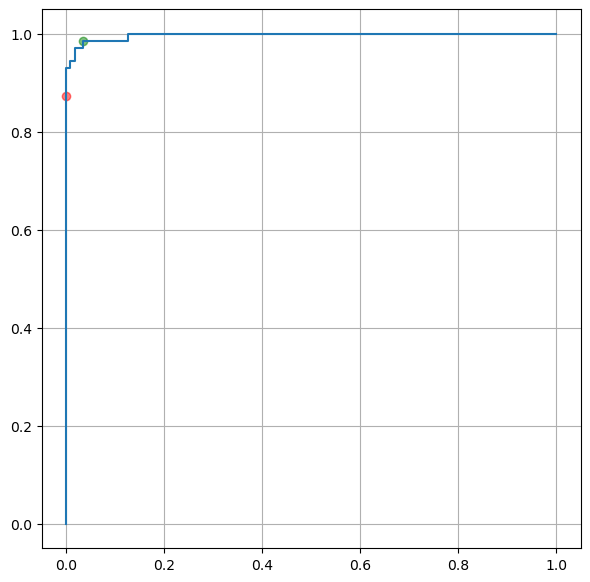

In [75]:
fp, tp, t = roc_curve(y2, y2d)
plt.figure(figsize=(7, 7))
f1=0
r1=62/71
f2=4/119
r2 = 70/71
plt.plot(f1, r1, 'or', alpha=0.5)
plt.plot(f2, r2, 'og', alpha=0.5)
plt.plot(fp, tp)
plt.grid(True)
plt.axis('scaled')

In [78]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X1n, y1)
y2db = lr.decision_function(X2n)
print(confusion_matrix(y2, y2db>=0))

(-0.05, 1.05, -0.05, 1.05)

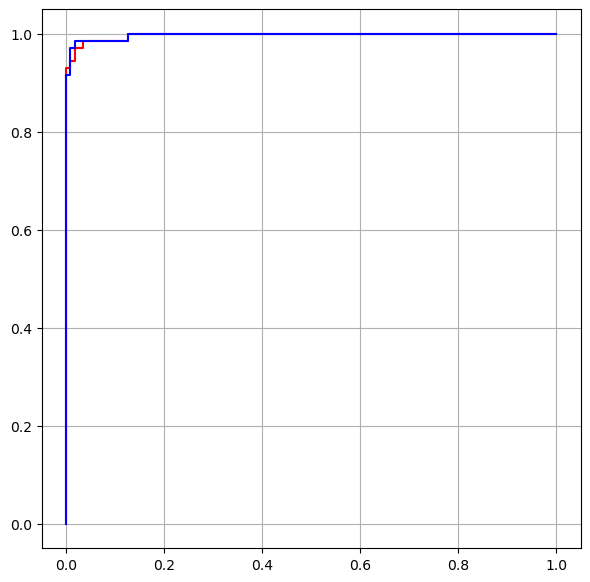

In [83]:
fp2, tp2, t2 = roc_curve(y2, y2db)
plt.figure(figsize=(7, 7))
plt.plot(fp, tp, 'r')
plt.plot(fp2, tp2, 'b')
plt.grid(True)
plt.axis('scaled')